# Agglomerative clustering - sklearn

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음
#cl = df.iloc[:, 3:]
cl = df.iloc[:, 4:] # Y값은 클러스터링시 사용되어서는 안됩니다.

In [3]:
aggcl = AgglomerativeClustering(n_clusters=10)
aggcl.fit(cl)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [5]:
# 클러스터링 데이터로 라벨링하여 기존 상권코드 데이터와 교체
y_pred = aggcl.labels_
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)
X = pd.concat([y_pred_df, df.drop(['sales_total', 'district'], axis=1)], axis=1) # Sales_total 속성은 맞추고자 하는 속성이므로 X에 포함되어서는 안됩니다.
X.tail()

,labels,year,code,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,3,2019,CS300008,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,3,2019,CS300009,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,3,2019,CS300011,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,3,2019,CS300016,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,3,2019,CS300017,6.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


In [6]:
# 더미변수화
X_dum = pd.get_dummies(X)
X_dum.tail()

,year,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,...,code_CS300008,code_CS300009,code_CS300010,code_CS300011,code_CS300012,code_CS300013,code_CS300014,code_CS300015,code_CS300016,code_CS300017
113260,2019,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,...,1,0,0,0,0,0,0,0,0,0
113261,2019,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,...,0,1,0,0,0,0,0,0,0,0
113262,2019,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,...,0,0,0,1,0,0,0,0,0,0
113263,2019,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,...,0,0,0,0,0,0,0,0,1,0
113264,2019,6.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, df.sales_total, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train)
Xs_test = rb.transform(X_test)

In [9]:
# 회귀분석
regressor = LinearRegression()
model = regressor.fit(Xs_train, y_train)

In [10]:
# 정확도 결과값
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))

0.4079888268813008
0.4057538106303451


In [11]:
# 오차 결과값
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 628533654.8121662
Mean Squared Error: 1.6037338387306842e+18
Root Mean Squared Error: 1266386133.3458624


# DBSCAN

In [12]:
df = pd.read_csv('df_grouped_rate.csv',encoding='utf-8' )
X=df[df.columns[4:]] # 마찬가지
y=df["district"]
X=np.array(X)
y=np.array(y)

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=10, min_samples=5)
y_pred = model.fit_predict(X)
y_pred

array([   0,    0,    0, ..., 4769, 4769, 4769])

In [14]:
for i in np.linspace(1, 1000, num=100):
    
    model = DBSCAN(eps=i, min_samples=5)
    y_pred = model.fit_predict(X)
    print(i,np.unique(y_pred))

1.0 [  -1    0    1 ... 2048 2049 2050]
11.090909090909092 [  -1    0    1 ... 4767 4768 4769]
21.181818181818183 [  -1    0    1 ... 4768 4769 4770]
31.272727272727273 [  -1    0    1 ... 4768 4769 4770]
41.36363636363637 [  -1    0    1 ... 4768 4769 4770]
51.45454545454546 [  -1    0    1 ... 4768 4769 4770]
61.54545454545455 [  -1    0    1 ... 4768 4769 4770]
71.63636363636364 [  -1    0    1 ... 4768 4769 4770]
81.72727272727273 [  -1    0    1 ... 4768 4769 4770]
91.81818181818183 [  -1    0    1 ... 4768 4769 4770]
101.90909090909092 [  -1    0    1 ... 4768 4769 4770]
112.00000000000001 [  -1    0    1 ... 4768 4769 4770]
122.0909090909091 [  -1    0    1 ... 4768 4769 4770]
132.1818181818182 [  -1    0    1 ... 4768 4769 4770]
142.27272727272728 [  -1    0    1 ... 4768 4769 4770]
152.36363636363637 [  -1    0    1 ... 4768 4769 4770]
162.45454545454547 [  -1    0    1 ... 4768 4769 4770]
172.54545454545456 [  -1    0    1 ... 4768 4769 4770]
182.63636363636365 [  -1    0    

# Hierachical clustering - scipy

In [15]:
# df = pd.read_csv('../raw_data/df_grouped_rate.csv',encoding='utf-8' )
df = pd.read_csv('df_grouped_rate.csv',encoding='utf-8' )

In [16]:
# idx = np.random.randint(0,len(df),size=30)  #표본추출할때 사용

In [17]:
X=df[df.columns[4:]] # 마찬가지
y=df["district"]
X=np.array(X)
y=np.array(y)

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
from sklearn.externals import joblib

Z = linkage(X, 'ward')  #와드거리

saved_model = pickle.dumps(Z)
joblib.dump(clf, 'sci_h_clust.pkl') #피클파일 저장

# Z = joblib.load('filename.pkl')  #load


/home/sjbuhan/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'clf' is not defined

## dendrogram 1

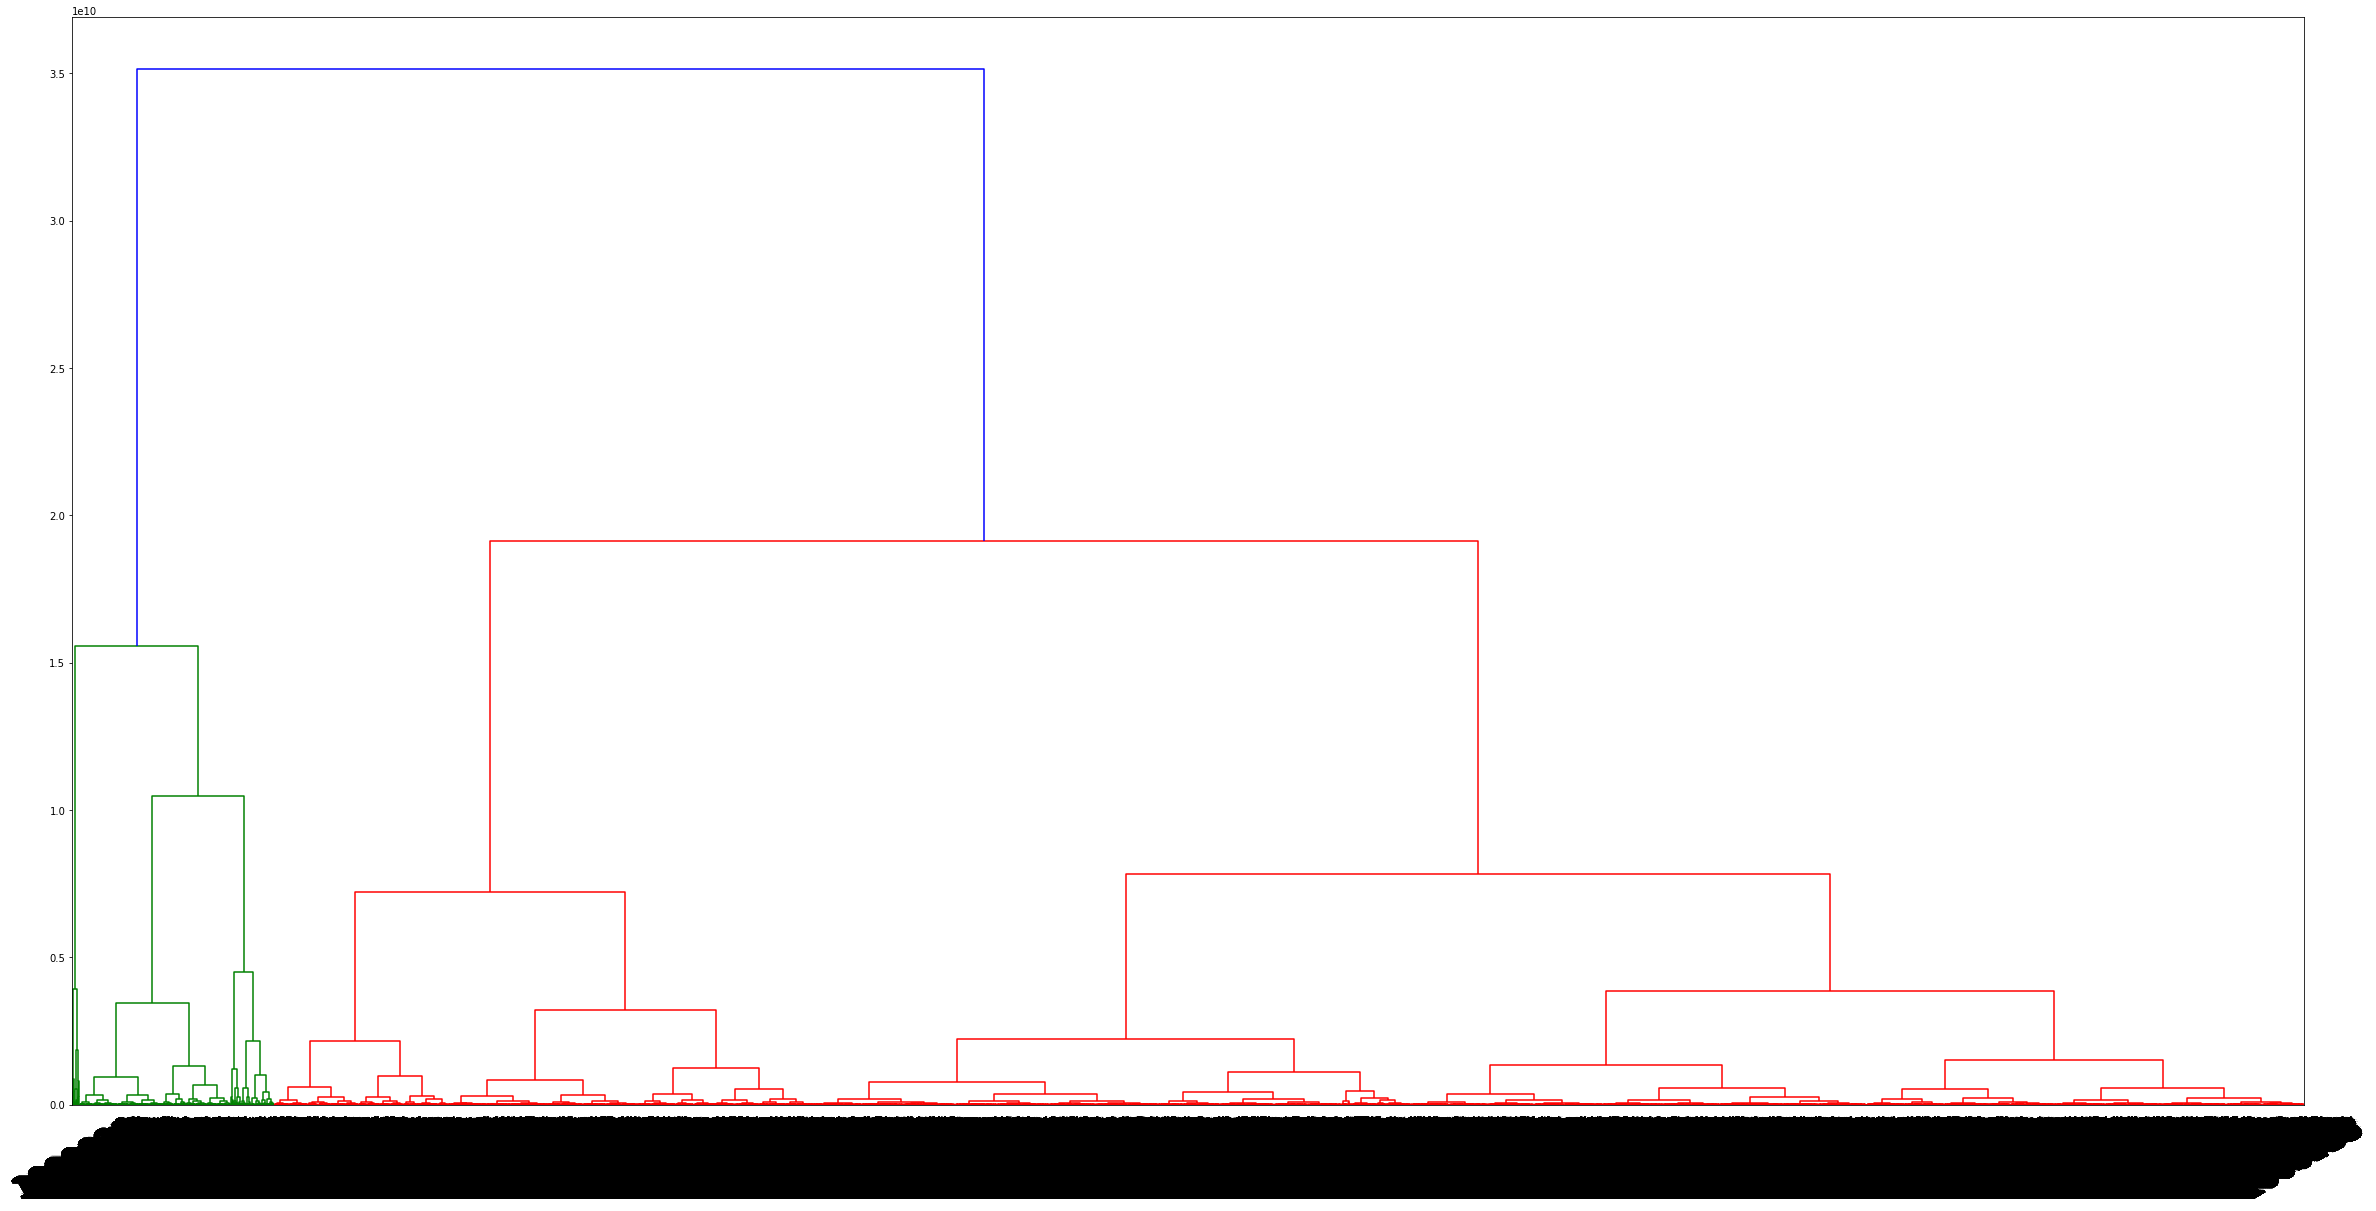

In [21]:
# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(Z,
           labels = y,
           leaf_rotation=30,
           leaf_font_size=30,
)
plt.show()


## dendrogram 2

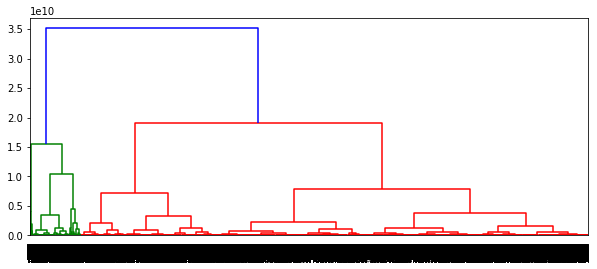

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

# for i in range(20):
#     imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
#     ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
#                         bboxprops={"edgecolor" : "none"})
#     ax.add_artist(ab)

plt.show()

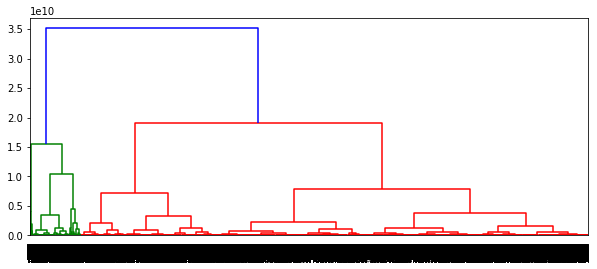

In [26]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig=plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

fig.savefig('dend_2.png', transparent=True) #png파일로 저장

plt.show()

In [ ]:
print('R2_HC',R2_HC)
print('MAE_HC',MAE_HC)
print('MSE_HC',MSE_HC)
print('RMSE_HC',RMSE_HC)